## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

import warnings 
warnings.filterwarnings('ignore')

In [262]:
data = 0

In [279]:
data = pd.read_csv("data/DailyDelhiClimateTrain.csv")
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,01 January 2013,10.000000,84.500000,0.000000,1015.666667
1,02 January 2013,7.400000,92.000000,2.980000,1017.800000
2,03 January 2013,7.166667,87.000000,4.633333,1018.666667
3,04 January 2013,8.666667,71.333333,1.233333,1017.166667
4,05 January 2013,NaN,86.833333,3.700000,1016.500000


### Missing Values



In [280]:
data["date"] = pd.to_datetime(data["date"], errors="ignore")

#####  Setting Index as date column

In [281]:
data = data.set_index("date")

In [282]:
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [283]:
data.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12,  1],
           dtype='int64', name='date', length=1462)

### Checking For any missing values

In [284]:
data.isna().sum()

meantemp         9
humidity         6
wind_speed      10
meanpressure    12
dtype: int64

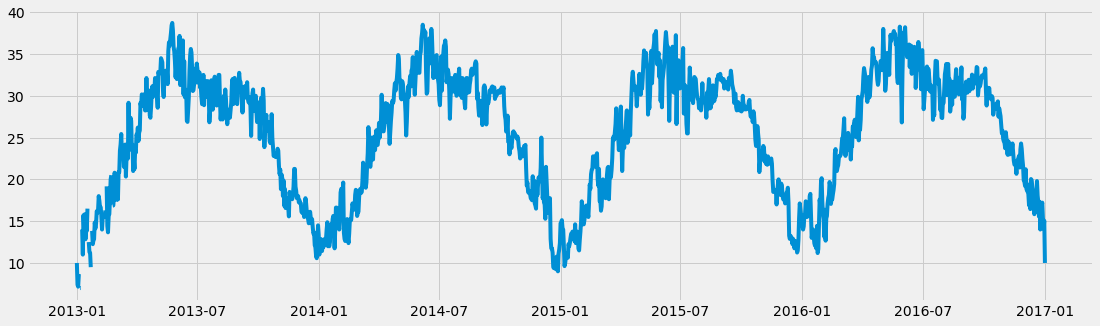

In [288]:
fig, ax=plt.subplots()
ax.plot(data.index, data["meantemp"])

In [291]:
#Feature Scaling
data["meanpressure"] = data["meanpressure"]/100

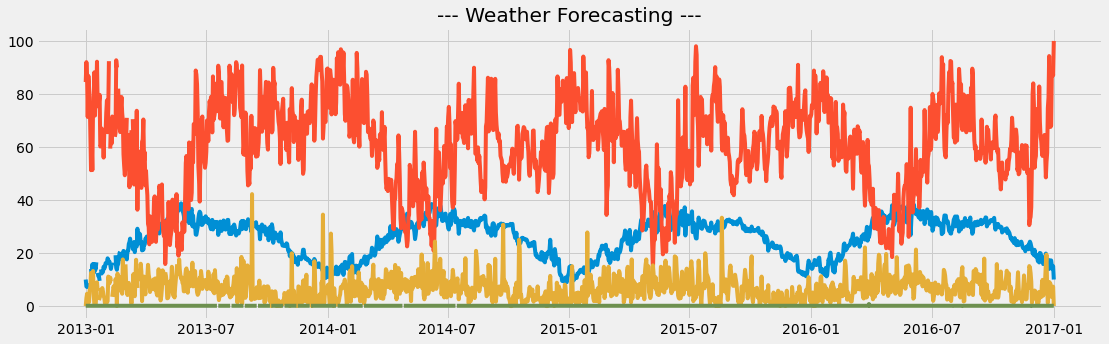

In [332]:
# Checking for Missing values in graphs

plt.rcParams['figure.figsize']=(17,5)
plt.plot(data)
plt.title("--- Weather Forecasting ---")
# plt.legend(["pressure","col2","col3", "col4"])
plt.show()

In [293]:
df2=data.copy()

In [294]:
df2.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,0.101567
2013-01-02,7.400000,92.000000,2.980000,0.101780
2013-01-03,7.166667,87.000000,4.633333,0.101867
2013-01-04,8.666667,71.333333,1.233333,0.101717
2013-01-05,NaN,86.833333,3.700000,0.101650


## Imputing Techniques for Time Series Problems

### 1. Mean Imputation

In [295]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy="mean")
imputed_ndarray=si.fit(df2).transform(df2.values)
imputed_df=pd.DataFrame(imputed_ndarray, 
                        columns=df2.columns)
imputed_df.set_index(df2.index)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,0.101567
2013-01-02,7.400000,92.000000,2.980000,0.101780
2013-01-03,7.166667,87.000000,4.633333,0.101867
2013-01-04,8.666667,71.333333,1.233333,0.101717
2013-01-05,25.559617,86.833333,3.700000,0.101650
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,0.101557
2016-12-29,15.238095,87.857143,6.000000,0.101690
2016-12-30,14.095238,89.666667,6.266667,0.101790


#####  ColumnTransfer Example: 

import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

A = [[7,2,3],[4,np.nan,6],[10,5,np.nan]]

column_trans = ColumnTransformer(
[('imp_col1', SimpleImputer(strategy='mean'), [1]),
 ('imp_col2', SimpleImputer(strategy='constant', fill_value=29), [2])],
remainder='passthrough')

print(column_trans.fit_transform(A)[:, [2,0,1]])


###  2. Last Observed Carried Forward Technique

In [304]:
df2.isna().sum()

meantemp          9
humidity          6
wind_speed       10
meanpressure     12
meantemp_locf     0
dtype: int64

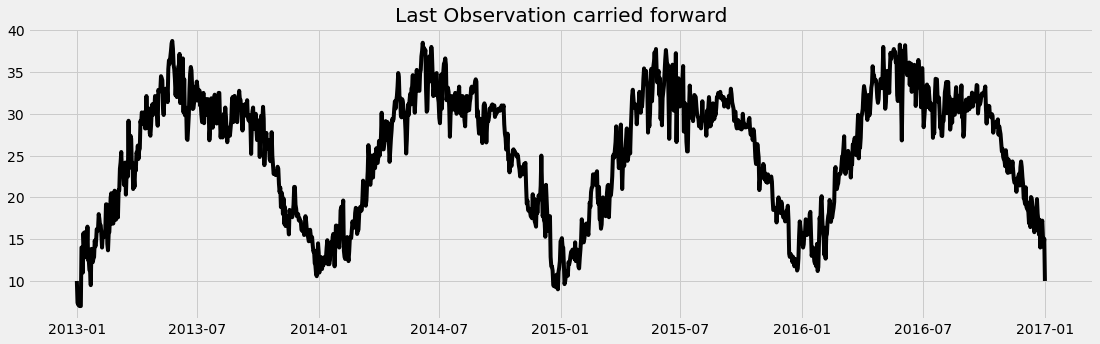

In [297]:
#LOCF
plt.rcParams["figure.figsize"]= (17,5)
df2["meantemp_locf"]=df2["meantemp"].bfill()
plt.plot(df2["meantemp_locf"], color="black")
plt.title("Last Observation carried forward")
plt.show()

### 3. Linear Interpolation Method

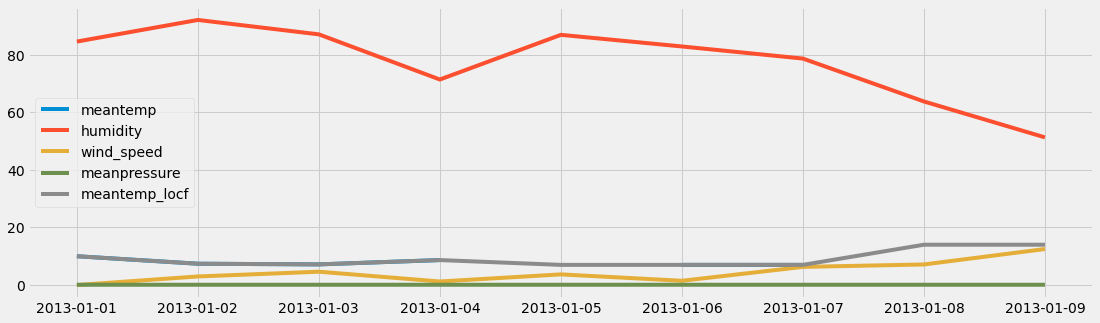

In [303]:
plt.plot(df2[df2.index<"2013-01-10"])
plt.legend(df2.columns)

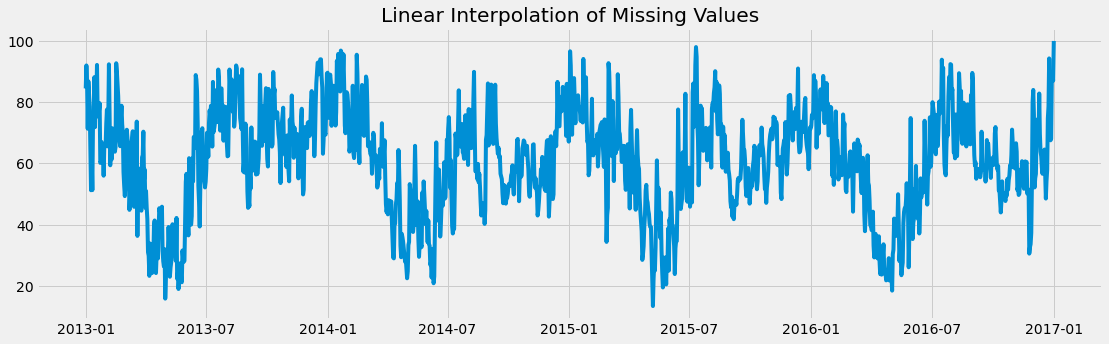

In [326]:
#Graph after Linear Interpolation

plt.rcParams['figure.figsize']=(17,5)
df2["meanpressure"]=df2["meanpressure"].interpolate(method='linear')
plt.plot(df2["humidity"])
plt.title("Linear Interpolation of Missing Values")
plt.show();

In [327]:
df2.isna().sum()

meantemp           0
humidity           0
wind_speed         0
meanpressure       0
meantemp_locf      0
meantemp_linear    0
dtype: int64

### 4. Seasonal Interpolation

In [318]:
missing_indexes = df2.index[df2["meantemp"].isnull()]
missing_indexes

DatetimeIndex([], dtype='datetime64[ns]', name='date', freq=None)

In [317]:
df2.loc['2013-01-08'].fillna((df2["2013-01-01":"2013-01-31":7].sum())/df2["2013-01-01":"2013-01-31":7].shape[0], inplace=True)
df2.loc['2013-01-18'].fillna((df2["2013-01-01":"2013-01-31":7].sum())/df2["2013-01-01":"2013-01-31":7].shape[0], inplace=True)
df2.loc['2013-01-23'].fillna((df2["2013-01-01":"2013-01-31":7].sum())/df2["2013-01-01":"2013-01-31":7].shape[0], inplace=True)
df2.loc['2013-02-11'].fillna((df2["2013-01-01":"2013-01-31":7].sum())/df2["2013-01-01":"2013-01-31":7].shape[0], inplace=True)
df2.loc['2013-02-14'].fillna((df2["2013-01-01":"2013-01-31":7].sum())/df2["2013-01-01":"2013-01-31":7].shape[0], inplace=True)
df2.loc['2013-02-23'].fillna((df2["2013-01-01":"2013-01-31":7].sum())/df2["2013-01-01":"2013-01-31":7].shape[0], inplace=True)
df2.loc['2013-03-02'].fillna((df2["2013-01-01":"2013-01-31":7].sum())/df2["2013-01-01":"2013-01-31":7].shape[0], inplace=True)
df2.loc['2013-03-11'].fillna((df2["2013-01-01":"2013-01-31":7].sum())/df2["2013-01-01":"2013-01-31":7].shape[0], inplace=True)


In [328]:
df2.isna().sum()

meantemp           0
humidity           0
wind_speed         0
meanpressure       0
meantemp_locf      0
meantemp_linear    0
dtype: int64

##  Handling Outliers 

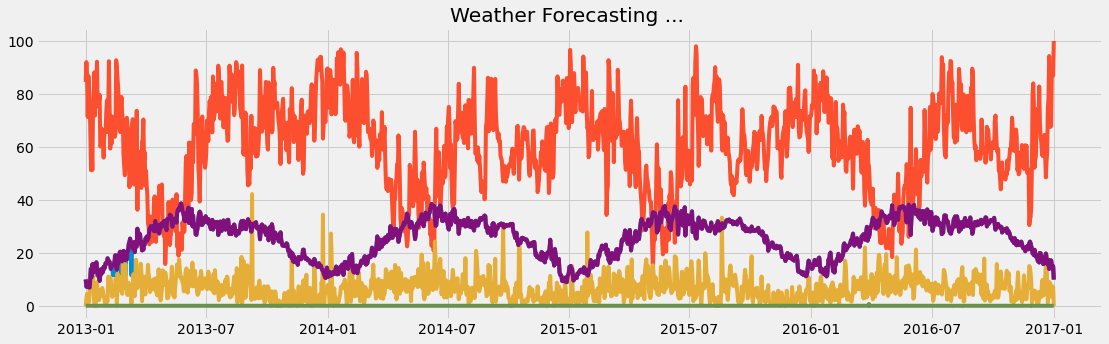

In [330]:
plt.rcParams['figure.figsize']=(17,5)
plt.plot(df2)
plt.title("Weather Forecasting ... ")
# plt.legend(["pressure","col2","col3", "col4"])
plt.show()

#### Using Scatter

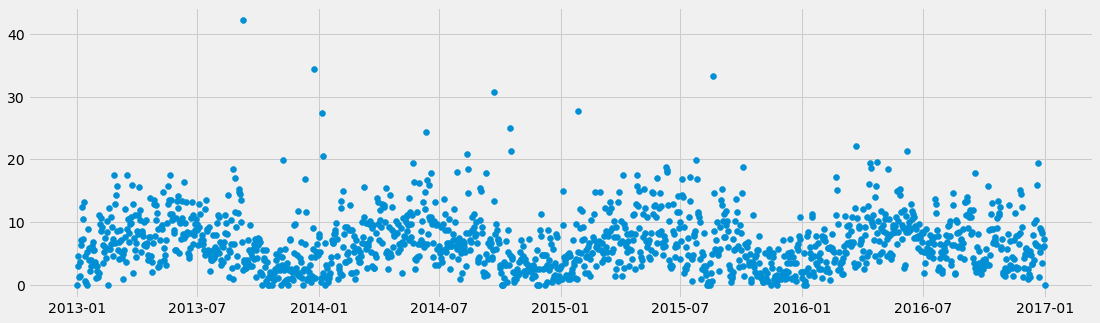

In [340]:
plt.scatter(df2.index,df2["wind_speed"])

#### Using BoxPlot

In [344]:
import seaborn as sb

In [350]:
df2.drop("meantemp_locf", axis=1, inplace=True)
df2.drop("meantemp_linear", axis=1, inplace=True)

In [351]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 89.4 KB


<AxesSubplot:xlabel='meanpressure'>

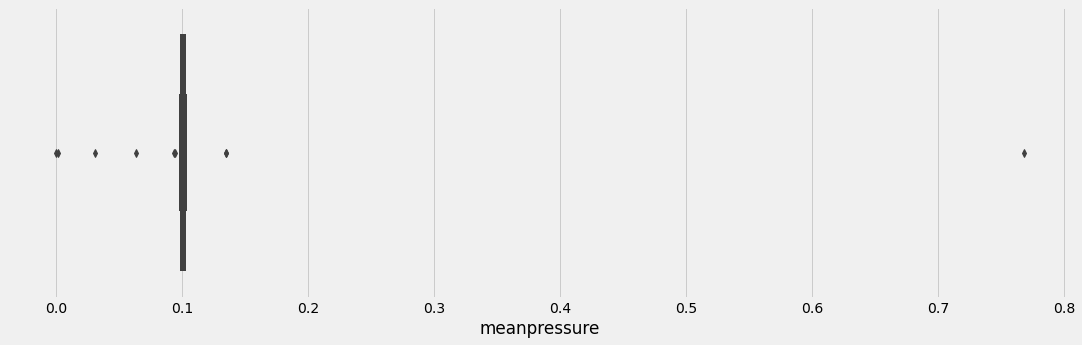

In [370]:
sb.boxplot(df2["meanpressure"])

In [362]:
df2['humidity'].loc[(df2['humidity']<20)]= 22

In [368]:
df2['wind_speed'].loc[(df2['wind_speed']>17)]=17

Since meanpressure has high outliers, lets not touch it

# Modelling

### Auto Regressor

In [373]:
len(df2)*0.8-len(df2)

-292.39999999999986

In [455]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
train, test = df2[0:len(df2)-300], df2[len(df2)-300:]


In [454]:
model=0

In [459]:
model = AutoReg(train, lags=None)
model

C:\Users\Naundla\miniconda3\envs\climate_analysis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [460]:
train.shape, test.shape

((1162, 4), (300, 4))

In [461]:
model_fit

In [462]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
preds=pd.DataFrame({"Pred":predictions})
preds.shape, test.shape, train.shape

((300, 1), (300, 4), (1162, 4))

In [463]:
print('Coefficients: %s' % model_fit.params)

Coefficients: const    25.471046
dtype: float64


In [464]:

preds

,Pred
2016-03-08,25.471046
2016-03-09,25.471046
2016-03-10,25.471046
2016-03-11,25.471046
2016-03-12,25.471046
...,...
2016-12-28,25.471046
2016-12-29,25.471046
2016-12-30,25.471046
2016-12-31,25.471046


In [465]:
test.shape, predictions.shape

((300, 4), (300,))

Test RMSE: 6.721


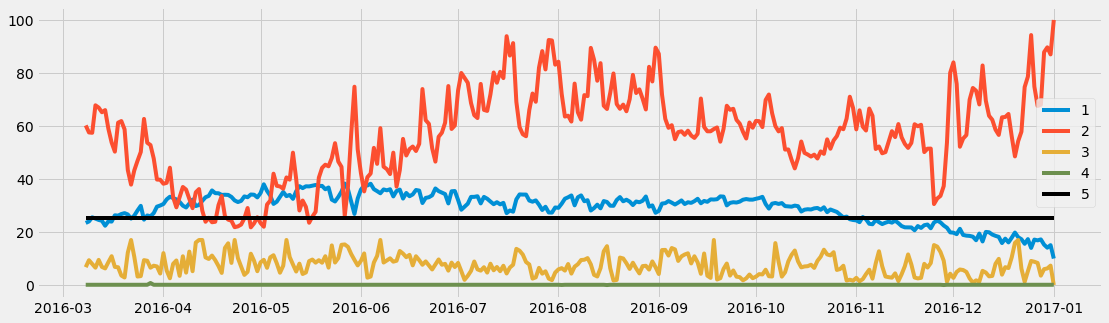

In [480]:
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
#range1= range(len(predictions))+1;
#for i in +1:
    #print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test["meantemp"], preds))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='black')
plt.legend([1,2,3,4,5])
plt.show()